In [9]:
# import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create

In [46]:
# read in the data
df = pd.read_csv(r'F:\Case studies\MovieIndustry\movies.csv')

In [47]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [17]:
# check missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [48]:
# drop rows with null value
df = df.dropna()

In [19]:
# check data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [49]:
#  fix the data type
df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [51]:
# correct year column
new = df['released'].str.split(', ',n=1,expand=True)
df['year'] = new[1].str[:4]

In [52]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [76]:
# Add a Country column
cou = df['released'].str.split('(',n=1,expand=True)
df['country'] = cou[1].str[:-1]

In [78]:
pd.set_option('display.max_rows',None)

In [79]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
df.drop_duplicates()

Text(0, 0.5, 'Budget')

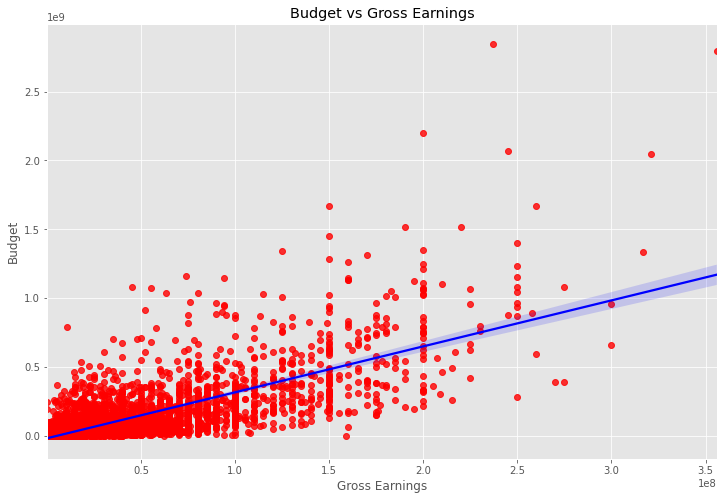

In [80]:
# plot budget vs gross using seaborn
sns.regplot(x = 'budget',y = 'gross', data = df, scatter_kws={"color": "red"},line_kws={"color":"blue"})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')

In [81]:
df.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


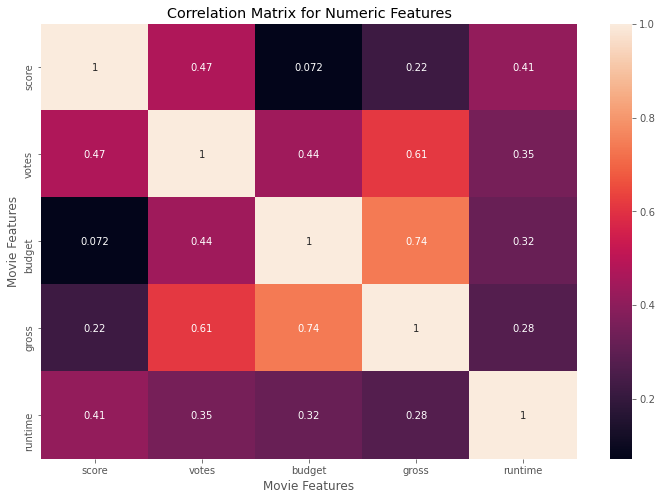

In [82]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [100]:
# check company correlation
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
    
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,29,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,39,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,17,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,35,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,38,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0


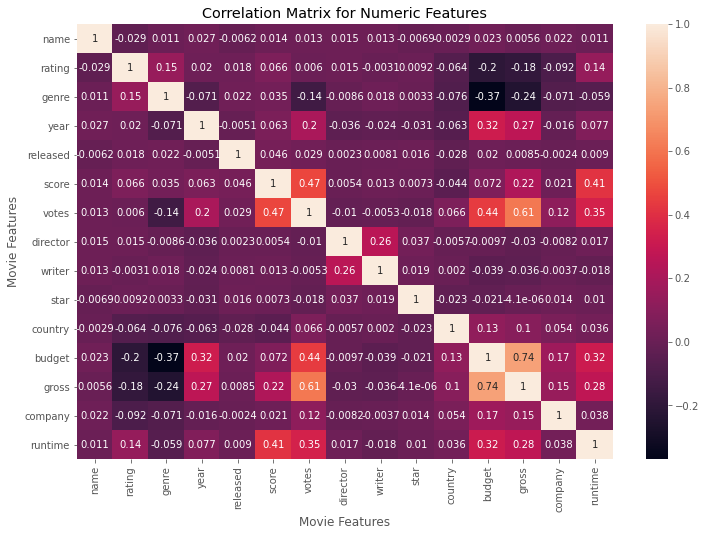

In [86]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [87]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.026759,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.002908,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019560,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,-0.063883,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.070699,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.075552,-0.368523,-0.244101,-0.071334,-0.059237
year,0.026759,0.019560,-0.070699,1.000000,-0.005141,0.062648,0.204183,-0.035738,-0.023603,-0.030840,-0.062715,0.321624,0.269479,-0.015587,0.076666
released,-0.006152,0.018083,0.022142,-0.005141,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.027578,0.019952,0.008501,-0.002407,0.008975
score,0.014450,0.065983,0.035106,0.062648,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043528,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.204183,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.066105,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.035738,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,-0.005705,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.023603,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.001983,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.030840,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.023346,-0.021473,-0.000004,0.014082,0.010108


In [93]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
gross     rating     -0.181906
rating    gross      -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
rating    company    -0.092357
company   rating     -0.092357
genre     country    -0.075552
country   genre      -0.075552
genre     company    -0.071334
company   genre      -0.071334
genre     year       -0.070699
year      genre      -0.070699
country   rating     -0.063883
rating    country    -0.063883
year      country    -0.062715
country   year       -0.062715
runtime   genre      -0.059237
genre     runtime    -0.059237
score     country    -0.043528
country   score      -0.043528
writer    budget     -0.039466
budget    writer     -0.039466
gross     writer     -0.035885
writer    gross      -0.035885
director  year       -0.035738
year      director   -0.035738
        

In [99]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.614751
votes     gross       0.614751
gross     budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlation to gross earnings